In [2]:
import gym
import pybulletgym.envs
import pickle
import numpy as np
from pathlib import Path
import seaborn as sns
import tensorflow as tf
import pandas as pd

In [3]:
base = Path('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs')

In [4]:
list(base.glob('*.csv'))

[PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run_pg_lb_rtg_dsa_.-tag-Eval_AverageReturn.csv'),
 PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run_pg_lb_rtg_na_.-tag-Eval_AverageReturn.csv'),
 PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run_pg_sb_rtg_na_.-tag-Eval_AverageReturn.csv'),
 PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run_pg_sb_rtg_dsa_.-tag-Eval_AverageReturn.csv'),
 PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run-pg_ll_b40000_r0.005_LunarLanderContinuous-v2-tag-Eval_AverageReturn.csv'),
 PosixPath('/home/cocoza4/workspace/berkeleydeeprlcourse/berkeley_deeprlcourse_homework_fall2019/hw2/run_logs/run_pg_sb_no_rtg_dsa_.-tag-Eval_AverageReturn.csv'),
 PosixPath

In [6]:
df1 = pd.read_csv(base/'run_pg_sb_rtg_na_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df1['Type'] = 'pg_sb_rtg_na'
df1

,Step,Value,Type
0,0,29.133333,pg_sb_rtg_na
1,1,42.099998,pg_sb_rtg_na
2,2,53.000000,pg_sb_rtg_na
3,3,102.250000,pg_sb_rtg_na
4,4,79.000000,pg_sb_rtg_na
...,...,...,...
95,95,200.000000,pg_sb_rtg_na
96,96,200.000000,pg_sb_rtg_na
97,97,200.000000,pg_sb_rtg_na
98,98,200.000000,pg_sb_rtg_na


In [8]:
df2 = pd.read_csv(base/'run_pg_sb_rtg_dsa_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df2['Type'] = 'pg_sb_rtg_dsa'
df2

,Step,Value,Type
0,0,29.000000,pg_sb_rtg_dsa
1,1,40.900002,pg_sb_rtg_dsa
2,2,67.285713,pg_sb_rtg_dsa
3,3,108.250000,pg_sb_rtg_dsa
4,4,138.666672,pg_sb_rtg_dsa
...,...,...,...
95,95,200.000000,pg_sb_rtg_dsa
96,96,200.000000,pg_sb_rtg_dsa
97,97,200.000000,pg_sb_rtg_dsa
98,98,200.000000,pg_sb_rtg_dsa


In [9]:
df3 = pd.read_csv(base/'run_pg_sb_no_rtg_dsa_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df3['Type'] = 'pg_sb_no_rtg_dsa'
df3

,Step,Value,Type
0,0,18.181818,pg_sb_no_rtg_dsa
1,1,27.266666,pg_sb_no_rtg_dsa
2,2,67.833336,pg_sb_no_rtg_dsa
3,3,107.500000,pg_sb_no_rtg_dsa
4,4,89.833336,pg_sb_no_rtg_dsa
...,...,...,...
95,95,166.333328,pg_sb_no_rtg_dsa
96,96,143.666672,pg_sb_no_rtg_dsa
97,97,181.666672,pg_sb_no_rtg_dsa
98,98,177.666672,pg_sb_no_rtg_dsa


In [10]:
df = pd.concat([df1, df2, df3]).rename(columns={'Value': 'Average Return'})
df

,Step,Average Return,Type
0,0,29.133333,pg_sb_rtg_na
1,1,42.099998,pg_sb_rtg_na
2,2,53.000000,pg_sb_rtg_na
3,3,102.250000,pg_sb_rtg_na
4,4,79.000000,pg_sb_rtg_na
...,...,...,...
95,95,166.333328,pg_sb_no_rtg_dsa
96,96,143.666672,pg_sb_no_rtg_dsa
97,97,181.666672,pg_sb_no_rtg_dsa
98,98,177.666672,pg_sb_no_rtg_dsa


<AxesSubplot:xlabel='Step', ylabel='Average Return'>

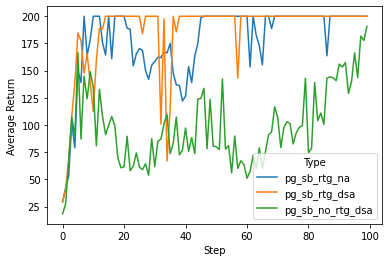

In [11]:
sns.lineplot(x='Step', y='Average Return', data=df, hue='Type')

In [12]:
df_lb1 = pd.read_csv(base/'run_pg_lb_rtg_na_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df_lb1['Type'] = 'pg_lb_rtg_na'
df_lb1

,Step,Value,Type
0,0,22.944445,pg_lb_rtg_na
1,1,45.909092,pg_lb_rtg_na
2,2,58.285713,pg_lb_rtg_na
3,3,79.166664,pg_lb_rtg_na
4,4,80.000000,pg_lb_rtg_na
...,...,...,...
95,95,200.000000,pg_lb_rtg_na
96,96,200.000000,pg_lb_rtg_na
97,97,200.000000,pg_lb_rtg_na
98,98,200.000000,pg_lb_rtg_na


In [13]:
df_lb2 = pd.read_csv(base/'run_pg_lb_rtg_dsa_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df_lb2['Type'] = 'pg_lb_rtg_dsa'
df_lb2

,Step,Value,Type
0,0,29.214285,pg_lb_rtg_dsa
1,1,49.555557,pg_lb_rtg_dsa
2,2,67.285713,pg_lb_rtg_dsa
3,3,118.500000,pg_lb_rtg_dsa
4,4,76.166664,pg_lb_rtg_dsa
...,...,...,...
95,95,200.000000,pg_lb_rtg_dsa
96,96,200.000000,pg_lb_rtg_dsa
97,97,200.000000,pg_lb_rtg_dsa
98,98,200.000000,pg_lb_rtg_dsa


In [14]:
df_lb3 = pd.read_csv(base/'run_pg_lb_no_rtg_dsa_.-tag-Eval_AverageReturn.csv').drop(columns=['Wall time'], axis=1)
df_lb3['Type'] = 'pg_lb_no_rtg_dsa'
df_lb3

,Step,Value,Type
0,0,30.285715,pg_lb_no_rtg_dsa
1,1,42.700001,pg_lb_no_rtg_dsa
2,2,67.666664,pg_lb_no_rtg_dsa
3,3,86.599998,pg_lb_no_rtg_dsa
4,4,145.666672,pg_lb_no_rtg_dsa
...,...,...,...
95,95,200.000000,pg_lb_no_rtg_dsa
96,96,200.000000,pg_lb_no_rtg_dsa
97,97,200.000000,pg_lb_no_rtg_dsa
98,98,200.000000,pg_lb_no_rtg_dsa


In [15]:
df_lb = pd.concat([df_lb1, df_lb2, df_lb3]).rename(columns={'Value': 'Average Return'})
df_lb

,Step,Average Return,Type
0,0,22.944445,pg_lb_rtg_na
1,1,45.909092,pg_lb_rtg_na
2,2,58.285713,pg_lb_rtg_na
3,3,79.166664,pg_lb_rtg_na
4,4,80.000000,pg_lb_rtg_na
...,...,...,...
95,95,200.000000,pg_lb_no_rtg_dsa
96,96,200.000000,pg_lb_no_rtg_dsa
97,97,200.000000,pg_lb_no_rtg_dsa
98,98,200.000000,pg_lb_no_rtg_dsa


<AxesSubplot:xlabel='Step', ylabel='Average Return'>

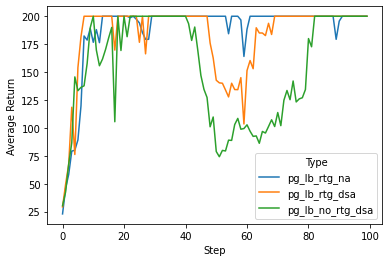

In [16]:
sns.lineplot(x='Step', y='Average Return', data=df_lb, hue='Type')

In [18]:
list(map(lambda x: x.stem, base.glob('run-pg_ip*')))

['run-pg_ip_b50_r5e-3_InvertedPendulum-v2-tag-Eval_AverageReturn']

In [20]:
df = (pd.read_csv(base/'run-pg_ip_b50_r5e-3_InvertedPendulum-v2-tag-Eval_AverageReturn.csv')
      .drop(columns=['Wall time'], axis=1).rename(columns={'Value': 'Average Return'}))
df

,Step,Average Return
0,0,14.750000
1,1,28.928572
2,2,44.500000
3,3,61.625000
4,4,47.500000
...,...,...
95,95,1000.000000
96,96,1000.000000
97,97,1000.000000
98,98,1000.000000


<AxesSubplot:xlabel='Step', ylabel='Average Return'>

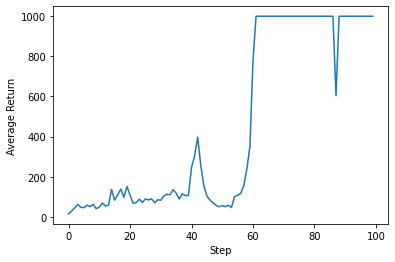

In [21]:
sns.lineplot(x='Step', y='Average Return', data=df)

In [17]:
df = (pd.read_csv(base/'run-pg_ll_b40000_r0.005_LunarLanderContinuous-v2-tag-Eval_AverageReturn.csv')
      .drop(columns=['Wall time'], axis=1).rename(columns={'Value': 'Average Return'}))
df

,Step,Average Return
0,0,-304.248627
1,1,-26.072634
2,2,-97.090706
3,3,-88.385223
4,4,-78.312607
...,...,...
95,95,155.760376
96,96,152.023026
97,97,170.074951
98,98,178.452316


<AxesSubplot:xlabel='Step', ylabel='Average Return'>

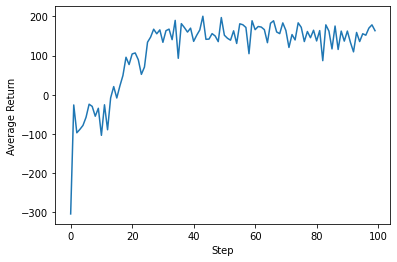

In [18]:
sns.lineplot(x='Step', y='Average Return', data=df)

In [7]:
list(map(lambda x: x.stem, base.glob('run-pg_hc*')))

['run-pg_hc_b50000_r0.02_rtg_baseline_HalfCheetah-v2-tag-Eval_AverageReturn',
 'run-pg_hc_b50000_r0.02_rtg_HalfCheetah-v2-tag-Eval_AverageReturn',
 'run-pg_hc_b50000_r0.02_baseline_HalfCheetah-v2-tag-Eval_AverageReturn',
 'run-pg_hc_b50000_r0.02_HalfCheetah-v2-tag-Eval_AverageReturn']

In [9]:
df_hc1 = (pd.read_csv(base/'run-pg_hc_b50000_r0.02_HalfCheetah-v2-tag-Eval_AverageReturn.csv')
          .drop(columns=['Wall time'], axis=1))
df_hc1['Type'] = 'pg_hc_default'
df_hc1

,Step,Value,Type
0,0,-146.847763,pg_hc_default
1,1,-155.812790,pg_hc_default
2,2,-192.230301,pg_hc_default
3,3,-119.031342,pg_hc_default
4,4,-132.906876,pg_hc_default
...,...,...,...
95,95,-0.942927,pg_hc_default
96,96,-35.506176,pg_hc_default
97,97,28.507294,pg_hc_default
98,98,-14.008041,pg_hc_default


In [10]:
df_hc2 = (pd.read_csv(base/'run-pg_hc_b50000_r0.02_rtg_HalfCheetah-v2-tag-Eval_AverageReturn.csv')
          .drop(columns=['Wall time'], axis=1))
df_hc2['Type'] = 'pg_hc_rtg'
df_hc2

,Step,Value,Type
0,0,-122.503479,pg_hc_rtg
1,1,-111.532837,pg_hc_rtg
2,2,-68.972687,pg_hc_rtg
3,3,-71.218475,pg_hc_rtg
4,4,-75.453377,pg_hc_rtg
...,...,...,...
95,95,118.756737,pg_hc_rtg
96,96,142.355301,pg_hc_rtg
97,97,157.064743,pg_hc_rtg
98,98,135.507797,pg_hc_rtg


In [11]:
df_hc3 = (pd.read_csv(base/'run-pg_hc_b50000_r0.02_baseline_HalfCheetah-v2-tag-Eval_AverageReturn.csv')
          .drop(columns=['Wall time'], axis=1))
df_hc3['Type'] = 'pg_hc_baseline'
df_hc3

,Step,Value,Type
0,0,-107.564636,pg_hc_baseline
1,1,-177.533249,pg_hc_baseline
2,2,-159.718155,pg_hc_baseline
3,3,-191.739853,pg_hc_baseline
4,4,-221.237564,pg_hc_baseline
...,...,...,...
95,95,-63.695942,pg_hc_baseline
96,96,-0.717162,pg_hc_baseline
97,97,-58.770542,pg_hc_baseline
98,98,-65.175499,pg_hc_baseline


In [12]:
df_hc4 = (pd.read_csv(base/'run-pg_hc_b50000_r0.02_rtg_baseline_HalfCheetah-v2-tag-Eval_AverageReturn.csv')
          .drop(columns=['Wall time'], axis=1))
df_hc4['Type'] = 'pg_hc_rtg_baseline'
df_hc4

,Step,Value,Type
0,0,-121.976837,pg_hc_rtg_baseline
1,1,-98.302406,pg_hc_rtg_baseline
2,2,-90.444862,pg_hc_rtg_baseline
3,3,-58.361298,pg_hc_rtg_baseline
4,4,-85.605247,pg_hc_rtg_baseline
...,...,...,...
95,95,344.846069,pg_hc_rtg_baseline
96,96,298.035675,pg_hc_rtg_baseline
97,97,261.413513,pg_hc_rtg_baseline
98,98,309.352020,pg_hc_rtg_baseline


In [13]:
df_hc = pd.concat([df_hc1, df_hc2, df_hc3, df_hc4]).rename(columns={'Value': 'Average Return'})
df_hc

,Step,Average Return,Type
0,0,-146.847763,pg_hc_default
1,1,-155.812790,pg_hc_default
2,2,-192.230301,pg_hc_default
3,3,-119.031342,pg_hc_default
4,4,-132.906876,pg_hc_default
...,...,...,...
95,95,344.846069,pg_hc_rtg_baseline
96,96,298.035675,pg_hc_rtg_baseline
97,97,261.413513,pg_hc_rtg_baseline
98,98,309.352020,pg_hc_rtg_baseline


<AxesSubplot:xlabel='Step', ylabel='Average Return'>

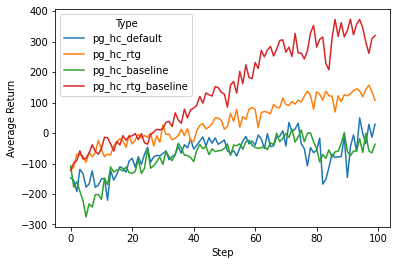

In [14]:
sns.lineplot(x='Step', y='Average Return', data=df_hc, hue='Type')